## ProjF3 - Baseline Model

Use this document as a template to provide the evaluation of your baseline model. You are welcome to go in as much depth as needed.

Make sure you keep the sections specified in this template, but you are welcome to add more cells with your code or explanation as needed.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

### 1. Load and Prepare Data

This should illustrate your code for loading the dataset and the split into training, validation and testing. You can add steps like pre-processing if needed.

In [ ]:
import pandas as pd

def loadData(dataFile):
    sheet = pd.read_excel(dataFile[0])
    for data in dataFile[1:]:
      sheet2 = pd.read_excel(data)
      sheet = pd.concat([sheet, sheet2], axis = 0)
    sheet['Time'] = pd.to_datetime(sheet['Time'])
    sheet['Time'] = (sheet['Time'] - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s')
    data = np.array(sheet)
    x = data[:,:-1]
    y = data[:,-1]

    return x, y

In [ ]:
import glob
import os
from sklearn.model_selection import train_test_split

files = glob.glob(os.path.join('/content/data', "*.xlsx"))
X, Y = loadData(files)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

print("Training Set Size:", len(X_train))
print("Test Set Size:", len(X_test))
print("Test Set Ratio:", len(X_test)/len(X_train))

Training Set Size: 1636
Test Set Size: 410
Test Set Ratio: 0.2506112469437653


### 2. Prepare your Baseline Model

Here you can have your code to either train (e.g., if you are building it from scratch) or load (e.g., in the case that you are loading a pre-trained model) your model. These steps may require you to use other packages or python files. You can just call them here. You don't have to include them in your submission. Remember that we will be looking at the saved outputs in the notebooked and we will not run the entire notebook.

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly = PolynomialFeatures(degree = 2)
X_poly = poly.fit_transform(X_train)
reg = LinearRegression()
reg.fit(X_poly, y_train)

y_test_pred = reg.predict(poly.fit_transform(X_test))
y_train_pred = reg.predict(poly.fit_transform(X_train))

### 3. Baseline Performance

Make sure to include the following:
- Performance on the training set
- Performance on the test set
- Provide some screenshots of your output (e.g., pictures, text output, or a histogram of predicted values in the case of tabular data). Any visualization of the predictions are welcome.

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

mse_test = mean_squared_error(y_test, y_test_pred)
mse_train = mean_squared_error(y_train, y_train_pred)

r2_test = r2_score(y_test, y_test_pred)
r2_train = r2_score(y_train, y_train_pred)

print("Mean Squared Error (Test):", mse_test)
print("Mean Squared Error (Train):", mse_train)
print("R^2 Score (Test):", r2_test)
print("R^2 Score (Train):", r2_train)

Mean Squared Error (Test): 2.28790255118944
Mean Squared Error (Train): 2.0237748110056044
R^2 Score (Test): 0.931409607997311
R^2 Score (Train): 0.9327065246305783


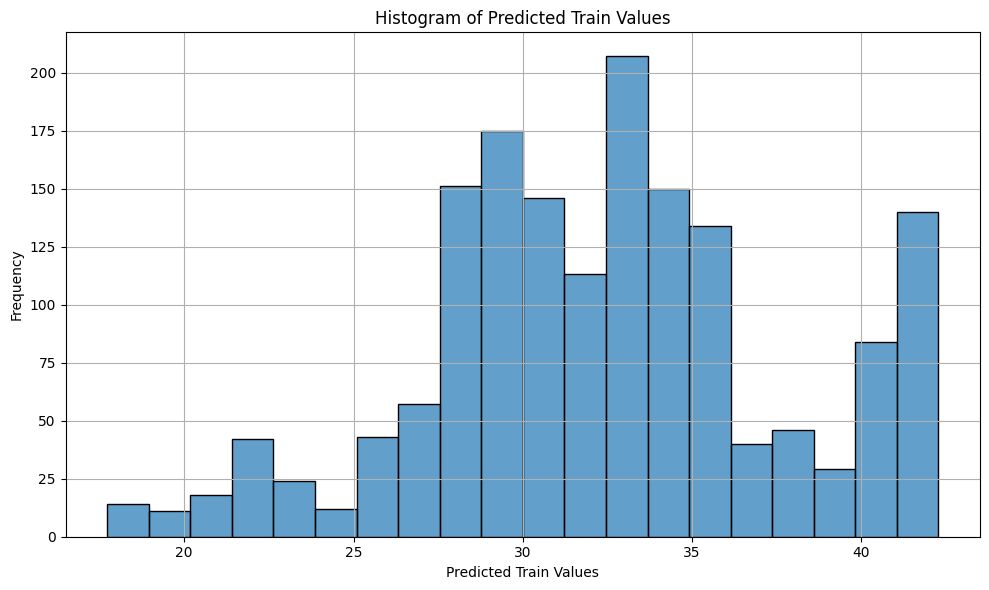

In [ ]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(y_train_pred, bins=20, alpha=0.7)
plt.xlabel('Predicted Train Values')
plt.ylabel('Frequency')
plt.title('Histogram of Predicted Train Values')
plt.grid(True)
plt.tight_layout()
plt.show()

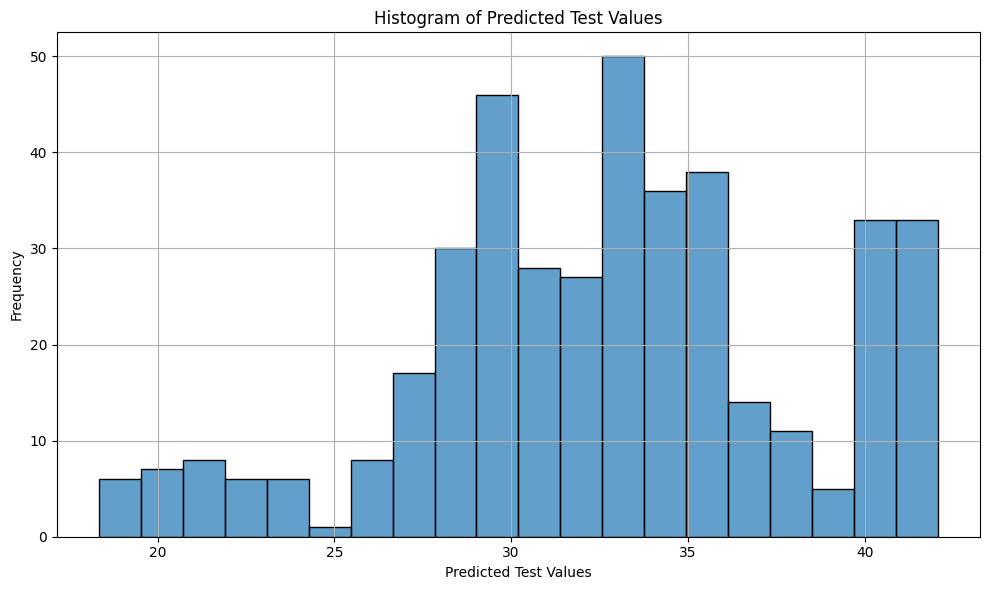

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(y_test_pred, bins=20, alpha=0.7)
plt.xlabel('Predicted Test Values')
plt.ylabel('Frequency')
plt.title('Histogram of Predicted Test Values')
plt.grid(True)
plt.tight_layout()
plt.show()

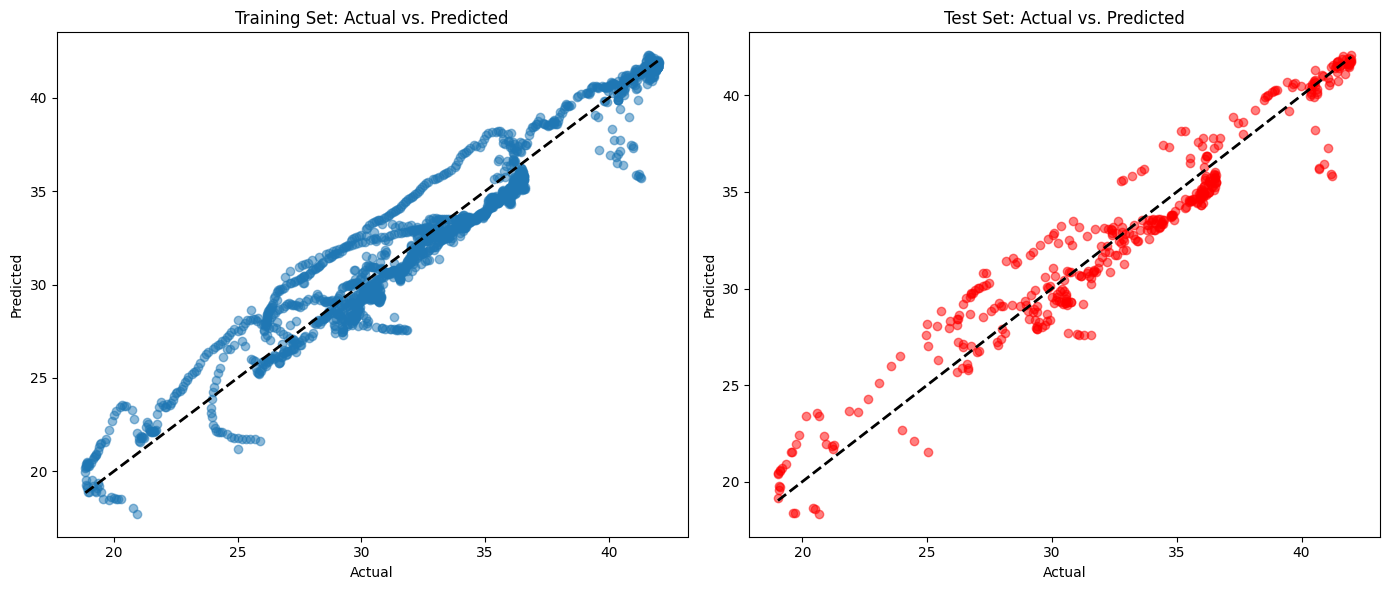

In [ ]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_train, y_train_pred, alpha=0.5)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Training Set: Actual vs. Predicted')

plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test_pred, alpha=0.5, color='red')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Test Set: Actual vs. Predicted')

plt.tight_layout()
plt.show()

In [ ]:
pd.set_option('display.max_rows',1000)
results = pd.DataFrame({
    'True Labels': y_test,
    'Predicted Labels': y_test_pred,
    'Difference': np.subtract(y_test, y_test_pred)
})
print("Prediction Results")
print(results)

Prediction Results
     True Labels  Predicted Labels  Difference
0      38.905577         40.216073   -1.310496
1      33.957912         33.426886    0.531026
2      40.488770         40.622839   -0.134069
3      41.918422         41.557389    0.361033
4      36.503149         35.951475    0.551674
5      30.252365         32.339721   -2.087356
6      41.995246         41.733993    0.261252
7      32.391542         32.880831   -0.489290
8      25.538012         28.812411   -3.274398
9      28.581720         31.352355   -2.770635
10     33.308841         32.557660    0.751181
11     29.258966         31.902284   -2.643318
12     35.593558         34.530981    1.062577
13     27.068554         30.050095   -2.981541
14     28.022096         29.092888   -1.070793
15     21.184914         21.825927   -0.641013
16     41.900476         41.946111   -0.045635
17     19.743534         21.957670   -2.214136
18     40.541284         40.691744   -0.150461
19     27.942119         27.410961    0.5